In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib as mpl

In [3]:
# import data
raw_df = pd.read_csv('f835051.csv')
# take out the golden training data (skews things dramatically)
raw_df = raw_df[raw_df['_golden'] == False]

In [ ]:
# part 0:
# extract and manipulate the data
# for each unit pair look up the means, variances, and the counts of observations

raw_scores = []
means = []
variances = []
unit_ids = []
counts = []
scorer = []
no_two_var = []
modes = []
counter = 0


for score_set in raw_df.groupby('_unit_id')['please_make_your_relevancy_judgment']:
    raw_scores.append(score_set[1])
    unit_ids.append(score_set[0])
    means.append(score_set[1].mean())
    variances.append(score_set[1].var())
    no_two_var.append(score_set[1][score_set[1] != 2].var())
    counts.append(score_set[1].count())
    modes.append(score_set[1].mode())
    counter += 1

    

In [ ]:
# part 1:
# remove the robots 

def remove_robots(scorer_list):
    
    return humans 
remove_robots(scorer_ids)

In [ ]:
# part 2: 
# score the scorers

In [ ]:
# part 3:
# aggregate the scores

In [ ]:
# part 4:
# binarize the scores 

In [44]:
# part 5:
# score the unit pairs (clear vs. unclear)

In [ ]:
# how do i aggregate the scores? 

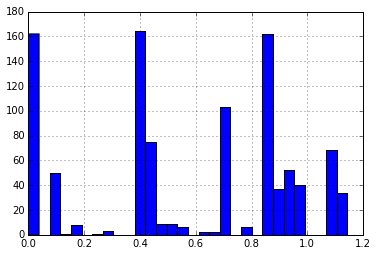

In [165]:
# strategy 1: identify the low variance scores, and just take the average for them since there is high conensus 

variances_series = pd.Series(data = variances)
variances_series.hist(bins = 30, label = 'Histogram')



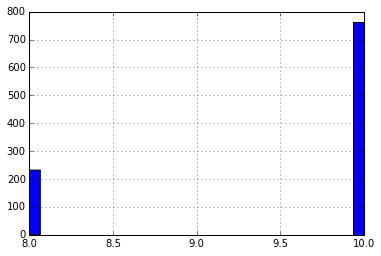

In [94]:
# perhaps differntiate between the counts, but honestly 8 and 10 are not very different, so i think not so much 

counts_series = pd.Series(data=counts)
counts_series.hist(bins = 30)

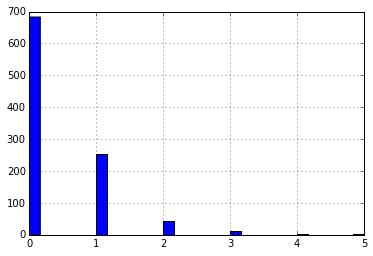

In [107]:
# see how many 2's there are, indicating confusion on the part of the scorers 
# so it is rare that it ends up looking like 
two_counts = []

raw_scores_series = pd.Series(data=raw_scores)
for unit_pair_score_set in raw_scores_series:
    two_counts.append(sum(unit_pair_score_set == 2))

two_counts_series = pd.Series(data= two_counts)
two_counts_series.hist(bins=30)

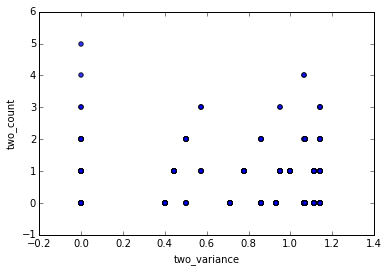

In [118]:
# this doesn't really make sense, becuase the twos' themselves actually produce less variance (bc closer to mean)
no_two_var_series = pd.Series(data = no_two_var)

temp_var_scatter_df = pd.DataFrame()
temp_var_scatter_df['two_count'] = two_counts_series
temp_var_scatter_df['two_variance'] = no_two_var_series
temp_var_scatter_df.plot(kind= 'scatter', y = 'two_count', x = "two_variance", alpha = .8)

In [152]:
## trust value, see if i can divide into two popoulations

worker_mean = []
worker_var = []
worker_count = 0
worker_job_count = []

for worker in raw_df.groupby('_worker_id'):
    worker_mean.append(worker[1]['please_make_your_relevancy_judgment'].mean())
    worker_var.append(worker[1]['please_make_your_relevancy_judgment'].var())
    worker_job_count.append(worker[1]['please_make_your_relevancy_judgment'].count())
    
    worker_count += 1
worker_count

80

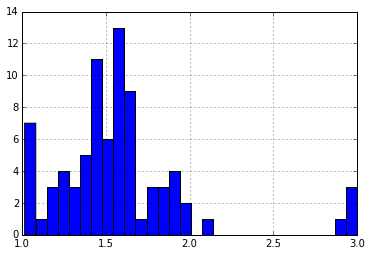

In [141]:
# some of these workers are just saying 3 to all or 1 to all, and so we need to get rid of them
# they're not really giving any kind of input that matters
pd.Series(data=worker_mean).hist(bins=30)

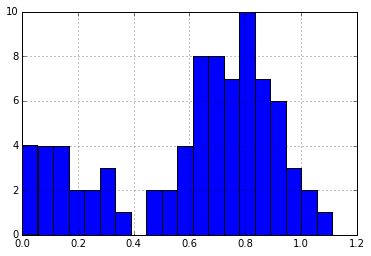

In [148]:
pd.Series(data=worker_var).hist(bins=20)
# the workers with zero variance are just doing the same thing over and over and we want to get rid of their opinions 
# maybe i want to divide these into two populations, the resaonble ones and the shitty ones?

80


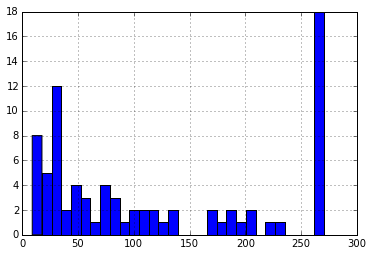

In [156]:
# how many distinct workers are there, and how many tasks did each of them do? 
print worker_count
pd.Series(data = worker_job_count).hist(bins = 30)

# there are a some workers who did a TON of tasks, and the rest follow a skewed distribution cutting off at 1


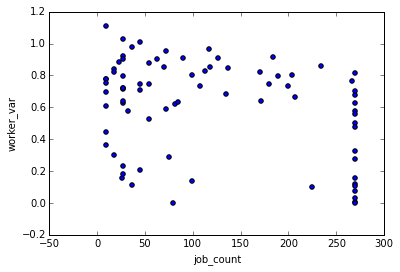

In [161]:
worker_df = pd.DataFrame()
worker_df['job_count'] = worker_job_count
worker_df['worker_var'] = worker_var
worker_df['worker_mean'] = worker_mean


# plot the number of tasks against  average score 
worker_df.plot(kind = 'scatter', y = 'worker_var',x = 'job_count')

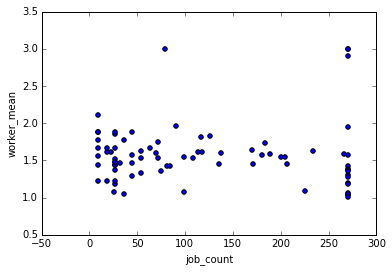

In [162]:
#plot the number of tasks against  variance 
worker_df.plot(kind = 'scatter', x = 'job_count', y = 'worker_mean')

# the top right people definitely need to go 

In [169]:
## how often their score corresponds with the majority(mode) score

task_mode_dict = dict(zip(unit_ids, modes))

agree_with_mode = []

for score_set in raw_scores:
mail    for score in score_set:
        agree_with_mode.append(score == )



In [170]:
## how many of these tasks they take on 


raw_scores

[2046    3
 2047    3
 2048    1
 2049    1
 2050    1
 2051    1
 2052    1
 2053    1
 Name: please_make_your_relevancy_judgment, dtype: int64, 2054    1
 2055    1
 2056    1
 2057    1
 2058    1
 2059    1
 2060    1
 2061    1
 Name: please_make_your_relevancy_judgment, dtype: int64, 2062    3
 2063    3
 2064    1
 2065    1
 2066    1
 2067    1
 2068    1
 2069    1
 Name: please_make_your_relevancy_judgment, dtype: int64, 2070    1
 2071    1
 2072    1
 2073    1
 2074    1
 2075    1
 2076    1
 2077    1
 2078    1
 2079    1
 Name: please_make_your_relevancy_judgment, dtype: int64, 2080    3
 2081    3
 2082    1
 2083    1
 2084    1
 2085    1
 2086    3
 2087    1
 Name: please_make_your_relevancy_judgment, dtype: int64, 2088    1
 2089    1
 2090    1
 2091    1
 2092    1
 2093    1
 2094    1
 2095    1
 2096    1
 2097    1
 Name: please_make_your_relevancy_judgment, dtype: int64, 2098    3
 2099    3
 2100    1
 2101    1
 2102    1
 2103    1
 2104    3
 2105    